SUJET:CLASSIFICATION D'IMAGE AVEC DES ALGORITHMES DE DEEP LEARNING


In [ ]:
#Installing package kaggle
!pip install -q kaggle

In [ ]:
#Create a folder named "kaggle"
! mkdir ~/.kaggle/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#copy the file kaggle.json into the folder "kaggle"
! cp '/content/drive/MyDrive/Kaggle/kaggle.json' ~/.kaggle/

In [ ]:
#give access rigths to the file kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                   title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                   Online Food Dataset                                  3KB  2024-03-02 18:50:30          11350        219  0.9411765        
syedanwarafridi/vehicle-sales-data                    Vehicle Sales Data                                  19MB  2024-02-21 20:16:17          20288        350  1.0              
bhavikjikadara/student-study-performance              Student Study Performance                            9KB  2024-03-07 06:14:09           6164         97  1.0              
julianoorlandi/spotify-top-songs-and-audio-features   Spotify Top Songs and Audio Features               526KB  202

In [ ]:
#download the dataset from kaggle
! kaggle datasets download -d rodrigonuneswessner/labeledcorndataset

100% 4.13G/4.13G [02:20<00:00, 31.0MB/s]
100% 4.13G/4.13G [02:20<00:00, 31.5MB/s]


In [ ]:
#unzip dataset file
! unzip /content/labeledcorndataset.zip -d DeepMais_Data

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: DeepMais_Data/ImagensTCCRotuladas/ImagensTCCRotuladas/Treino/Milho_ervas/Imagem_02019_T3.jpg  
  inflating: DeepMais_Data/ImagensTCCRotuladas/ImagensTCCRotuladas/Treino/Milho_ervas/Imagem_02020_T.jpg  
  inflating: DeepMais_Data/ImagensTCCRotuladas/ImagensTCCRotuladas/Treino/Milho_ervas/Imagem_02020_T3.jpg  
  inflating: DeepMais_Data/ImagensTCCRotuladas/ImagensTCCRotuladas/Treino/Milho_ervas/Imagem_02021_T.jpg  
  inflating: DeepMais_Data/ImagensTCCRotuladas/ImagensTCCRotuladas/Treino/Milho_ervas/Imagem_02021_T2.jpg  
  inflating: DeepMais_Data/ImagensTCCRotuladas/ImagensTCCRotuladas/Treino/Milho_ervas/Imagem_02022_T.jpg  
  inflating: DeepMais_Data/ImagensTCCRotuladas/ImagensTCCRotuladas/Treino/Milho_ervas/Imagem_02023_T.jpg  
  inflating: DeepMais_Data/ImagensTCCRotuladas/ImagensTCCRotuladas/Treino/Milho_ervas/Imagem_02023_T3.jpg  
  inflating: DeepMais_Data/ImagensTCCRotuladas/ImagensTCCRotul

In [ ]:
import os

In [ ]:
#base_dir = '/content/DeepMais_Data/ImagensTCCRotuladas/ImagensTCCRotuladas/'
base_dir='/content/drive/MyDrive/DeepMais_Data/ImagensTCCRotuladas/ImagensTCCRotuladas'

train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Teste')

#repertories with training images
train_chao_dir = os.path.join(train_dir, 'Chao')
train_ervas_dir = os.path.join(train_dir, 'Ervas')
train_milho_dir = os.path.join(train_dir, 'Milho')
train_milho_ervas_dir = os.path.join(train_dir, 'Milho_ervas')

#repositories with validation images
validation_chao_dir = os.path.join(validation_dir, 'Chao')
validation_ervas_dir = os.path.join(validation_dir, 'Ervas')
validation_milho_dir = os.path.join(validation_dir, 'Milho')
validation_milho_ervas_dir = os.path.join(validation_dir, 'Milho_ervas')

#repositories with testing images
test_chao_dir = os.path.join(test_dir, 'Chao')
test_ervas_dir = os.path.join(test_dir, 'Ervas')
test_milho_dir = os.path.join(test_dir, 'Milho')
test_milho_ervas_dir = os.path.join(test_dir, 'Milho_ervas')


In [ ]:
train_chao_fnames = os.listdir(train_chao_dir)
train_ervas_fnames = os.listdir(train_ervas_dir)

print("--------Some images Chao from the train folder----")
print(train_chao_fnames[:11])
print(" ")
print("--------Some images Ervas from the train folder----")
print(train_ervas_fnames[:12])

--------Some images Chao from the train folder----
['Imagem_03539_Tc.jpg', 'Imagem_03504_Tc.jpg', 'Imagem_03515_T1.jpg', 'Imagem_03600_T2.jpg', 'Imagem_03570_T2.jpg', 'Imagem_03592_T2.jpg', 'Imagem_03593_T2.jpg', 'Imagem_03546_T2.jpg', 'Imagem_03520_Tc.jpg', 'Imagem_03548_T2.jpg', 'Imagem_03524_Tc.jpg']
 
--------Some images Ervas from the train folder----
['Imagem_05473_D3.jpg', 'Imagem_05479_D3.jpg', 'Imagem_05527_D3.jpg', 'Imagem_05512_D3.jpg', 'Imagem_05472_D3.jpg', 'Imagem_05511_D3.jpg', 'Imagem_05495_D3.jpg', 'Imagem_05510_D3.jpg', 'Imagem_05478_D3.jpg', 'Imagem_05496_D3.jpg', 'Imagem_05485_D3.jpg', 'Imagem_05525_D3.jpg']


In [ ]:
print('total training Chao images :', len(os.listdir(train_chao_dir )))
print('total training Ervas images :', len(os.listdir(train_ervas_dir)))
print('total training Milho images :', len(os.listdir(train_milho_dir)))
print('total training Milho_Ervas images :', len(os.listdir(train_milho_ervas_dir)))
print(" ")
print('total validation Chao images :', len(os.listdir(validation_chao_dir)))
print('total validation Ervas images :', len(os.listdir(validation_ervas_dir)))
print('total validation Milho images :', len(os.listdir(validation_milho_dir)))
print('total validation Milho_Ervas images :', len(os.listdir(validation_milho_ervas_dir)))
print(' ')
print('total test Chao images :', len(os.listdir(test_chao_dir)))
print('total test Ervas images :', len(os.listdir(test_ervas_dir)))
print('total test Milho images :', len(os.listdir(test_milho_dir)))
print('total test Milho_Ervas images :', len(os.listdir(test_milho_ervas_dir)))

total training Chao images : 607
total training Ervas images : 606
total training Milho images : 612
total training Milho_Ervas images : 614
 
total validation Chao images : 105
total validation Ervas images : 106
total validation Milho images : 108
total validation Milho_Ervas images : 104
 
total test Chao images : 100
total test Ervas images : 100
total test Milho images : 100
total test Milho_Ervas images : 100


----showing some milho training images-----


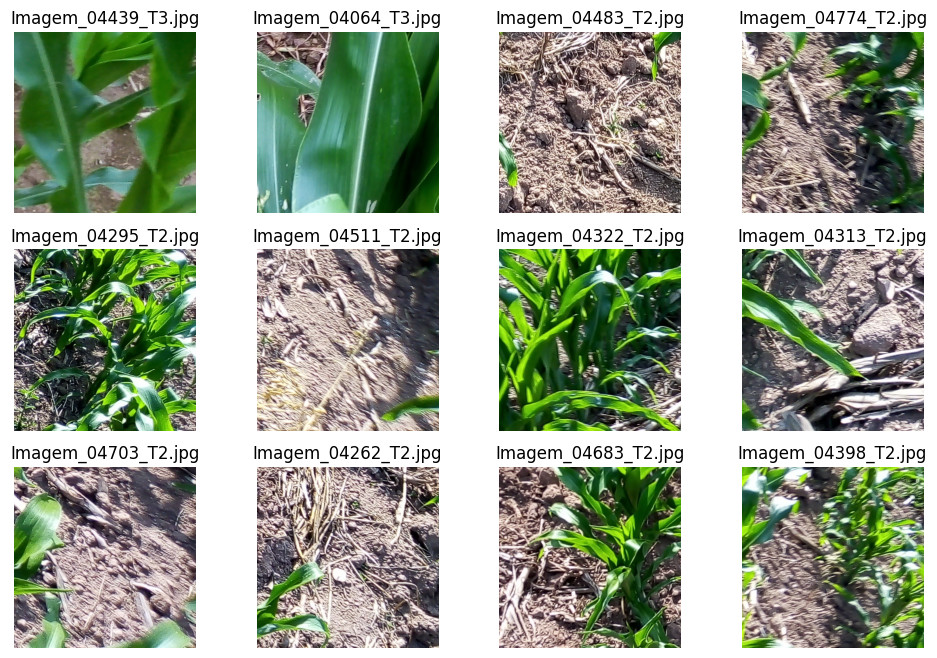

In [ ]:
#showing some training images
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

samples_milho = np.random.choice(os.listdir(train_milho_dir),size = 12)

plt.figure(figsize = (12,8))
print('----showing some milho training images-----')
for i,milho in enumerate(samples_milho):
    ax = plt.subplot(3,4,i+1)
    img = mpimg.imread(os.path.join(train_milho_dir,milho))
    plt.axis("off")
    plt.imshow(img)
    ax.set_title(milho)




In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_datagen = ImageDataGenerator(rescale = 1/255.0)
test_datagen=ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 30,
    class_mode = 'sparse'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 30,
    class_mode = 'sparse'
)
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 30,
    class_mode = 'sparse'
)

Found 2439 images belonging to 4 classes.
Found 423 images belonging to 4 classes.
Found 423 images belonging to 4 classes.


In [ ]:
#architecture
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,input_shape = (150,150,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
#optimiser RMSprop
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics = ['acc'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=81,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=14
)

Epoch 1/10
81/81 [==============================] - 467s 6s/step - loss: 1.2217 - acc: 0.4545 - val_loss: 0.8754 - val_acc: 0.6619
Epoch 2/10
81/81 [==============================] - 159s 2s/step - loss: 0.8508 - acc: 0.6164 - val_loss: 0.7053 - val_acc: 0.6714
Epoch 3/10
81/81 [==============================] - 151s 2s/step - loss: 0.7204 - acc: 0.6775 - val_loss: 0.8734 - val_acc: 0.5929
Epoch 4/10
81/81 [==============================] - 144s 2s/step - loss: 0.6347 - acc: 0.7285 - val_loss: 0.6401 - val_acc: 0.7167
Epoch 5/10
81/81 [==============================] - 148s 2s/step - loss: 0.5769 - acc: 0.7543 - val_loss: 0.6081 - val_acc: 0.7238
Epoch 6/10
81/81 [==============================] - 156s 2s/step - loss: 0.5037 - acc: 0.7808 - val_loss: 0.8235 - val_acc: 0.6690
Epoch 7/10
81/81 [==============================] - 152s 2s/step - loss: 0.4763 - acc: 0.8028 - val_loss: 0.8010 - val_acc: 0.6262
Epoch 8/10
81/81 [==============================] - 150s 2s/step - loss: 0.3947 - a

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(acc)

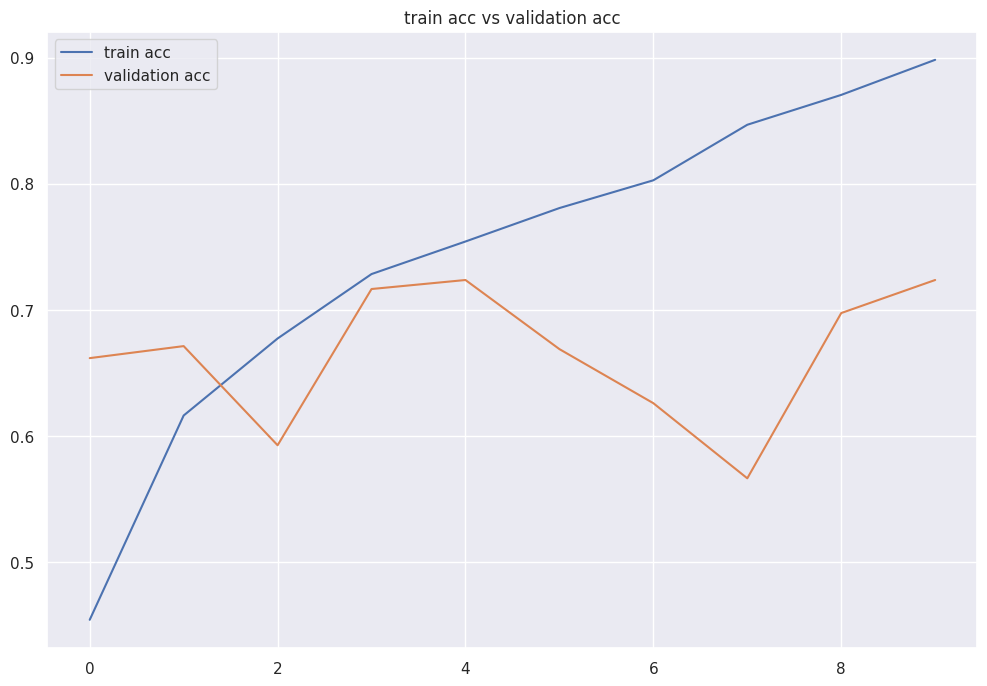

In [ ]:
import seaborn as sns
sns.set()
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

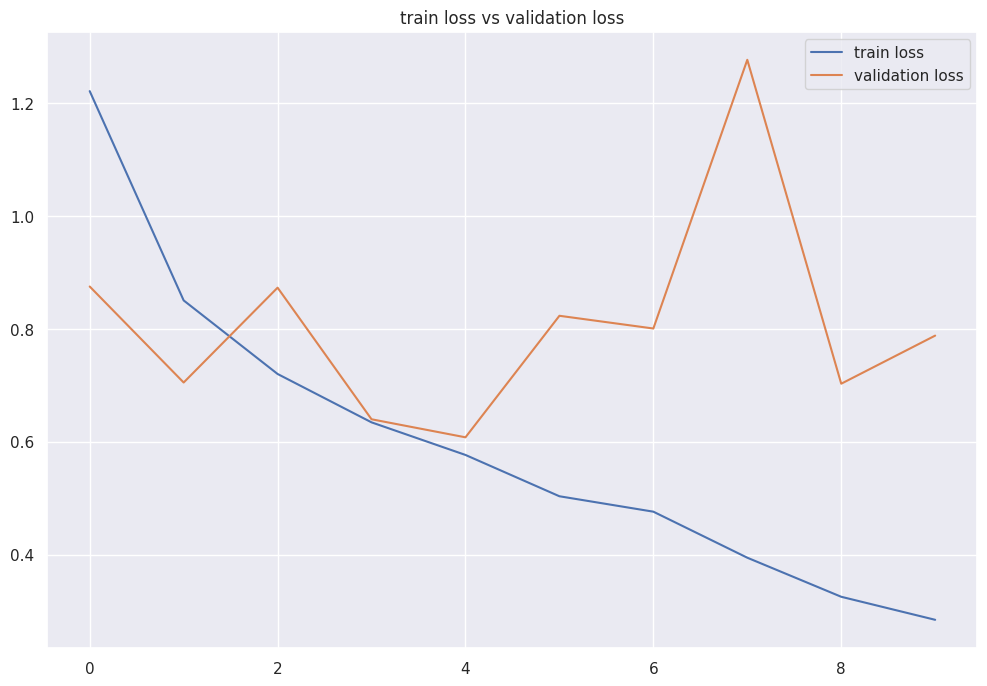

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train loss")
plt.plot(np.arange(epochs),val_loss,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

In [ ]:
#Optimiser ADAM
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=81,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=14
)

Epoch 1/10
81/81 [==============================] - 295s 4s/step - loss: 0.2334 - accuracy: 0.9149 - val_loss: 0.9336 - val_accuracy: 0.6905
Epoch 2/10
81/81 [==============================] - 149s 2s/step - loss: 0.1367 - accuracy: 0.9502 - val_loss: 1.5154 - val_accuracy: 0.6357
Epoch 3/10
81/81 [==============================] - 149s 2s/step - loss: 0.1101 - accuracy: 0.9601 - val_loss: 1.3100 - val_accuracy: 0.6929
Epoch 4/10
81/81 [==============================] - 147s 2s/step - loss: 0.1100 - accuracy: 0.9664 - val_loss: 1.1691 - val_accuracy: 0.6976
Epoch 5/10
81/81 [==============================] - 150s 2s/step - loss: 0.0708 - accuracy: 0.9743 - val_loss: 1.5924 - val_accuracy: 0.7071
Epoch 6/10
81/81 [==============================] - 147s 2s/step - loss: 0.1207 - accuracy: 0.9635 - val_loss: 1.4635 - val_accuracy: 0.6833
Epoch 7/10
81/81 [==============================] - 156s 2s/step - loss: 0.1218 - accuracy: 0.9597 - val_loss: 1.3021 - val_accuracy: 0.6762
Epoch 8/10
81

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(acc)

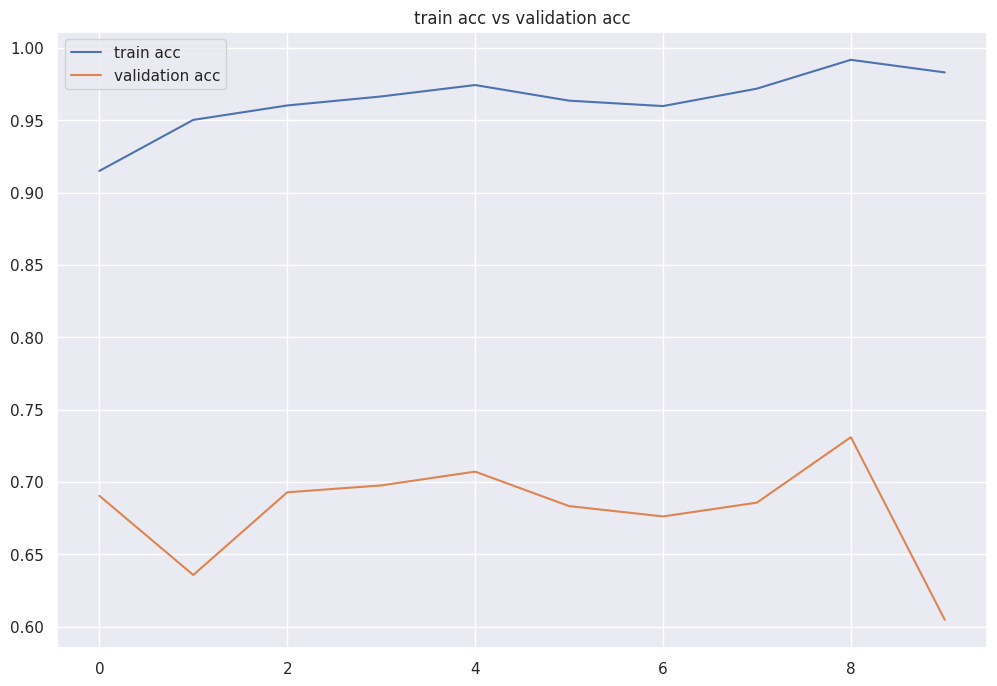

In [ ]:
#showing train accurary courb and validation accury courb
import seaborn as sns
sns.set()
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

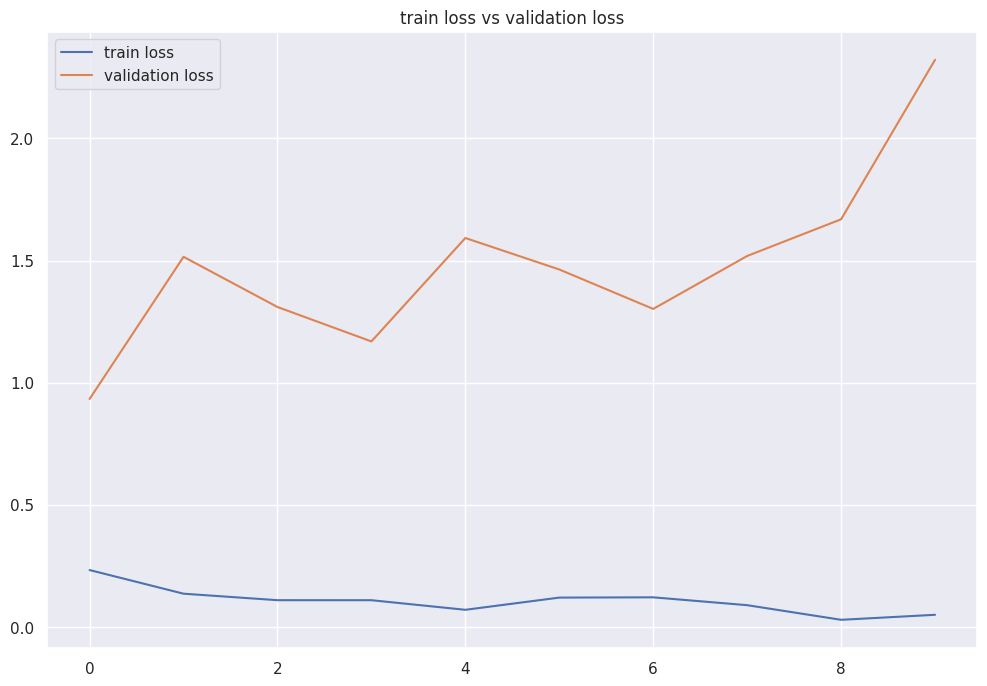

In [ ]:
#showing train loss courb and validation loss courb
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train loss")
plt.plot(np.arange(epochs),val_loss,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

In [ ]:
#model with dropout and batch normalization
import tensorflow as tf
model_db = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,input_shape = (150,150,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4,activation = 'softmax')
])

In [ ]:
model_db.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 36, 36, 64)       

In [ ]:
#Dropout+BatchNormalizationADAM
model_db.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
history_db = model_db.fit(
    train_generator,
    steps_per_epoch=81,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=14
)

Epoch 1/10
81/81 [==============================] - 175s 2s/step - loss: 1.3561 - accuracy: 0.5156 - val_loss: 4.6637 - val_accuracy: 0.2643
Epoch 2/10
81/81 [==============================] - 172s 2s/step - loss: 0.8929 - accuracy: 0.6285 - val_loss: 4.3330 - val_accuracy: 0.2452
Epoch 3/10
81/81 [==============================] - 169s 2s/step - loss: 0.7642 - accuracy: 0.6696 - val_loss: 2.9446 - val_accuracy: 0.3167
Epoch 4/10
81/81 [==============================] - 160s 2s/step - loss: 0.6542 - accuracy: 0.7210 - val_loss: 3.2478 - val_accuracy: 0.2476
Epoch 5/10
81/81 [==============================] - 163s 2s/step - loss: 0.6428 - accuracy: 0.7186 - val_loss: 2.3368 - val_accuracy: 0.3143
Epoch 6/10
81/81 [==============================] - 156s 2s/step - loss: 0.6085 - accuracy: 0.7389 - val_loss: 1.2553 - val_accuracy: 0.5333
Epoch 7/10
81/81 [==============================] - 166s 2s/step - loss: 0.5969 - accuracy: 0.7397 - val_loss: 2.3811 - val_accuracy: 0.2571
Epoch 8/10
81

In [ ]:
acc = history_db.history['accuracy']
val_acc = history_db.history['val_accuracy']

loss = history_db.history['loss']
val_loss = history_db.history['val_loss']
epochs = len(acc)

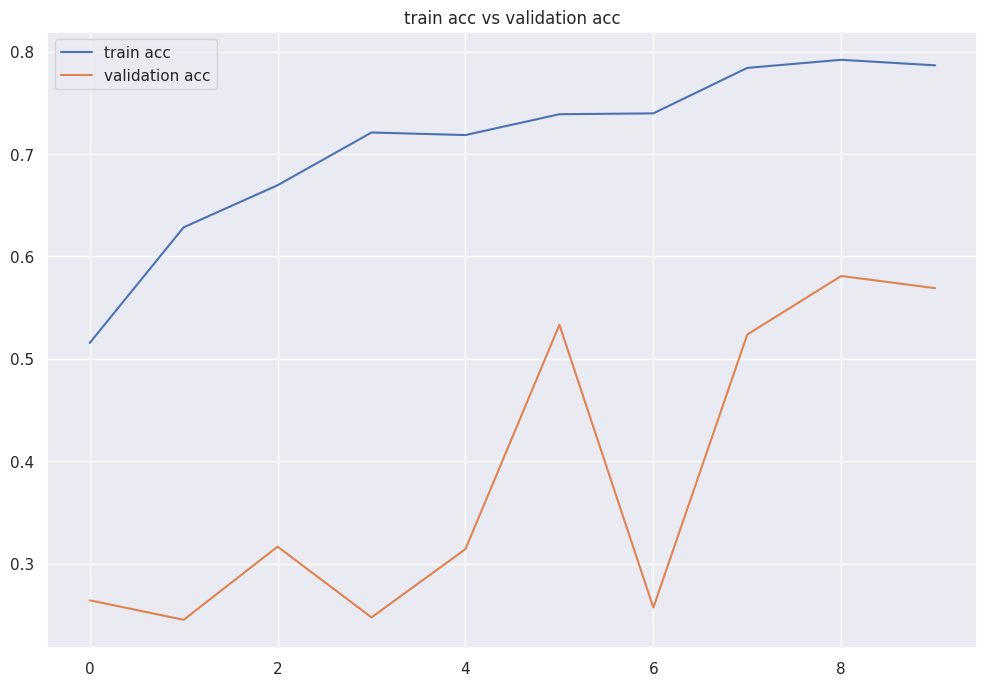

In [ ]:
#showing train accurary courb and validation accury courb
import seaborn as sns
sns.set()
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

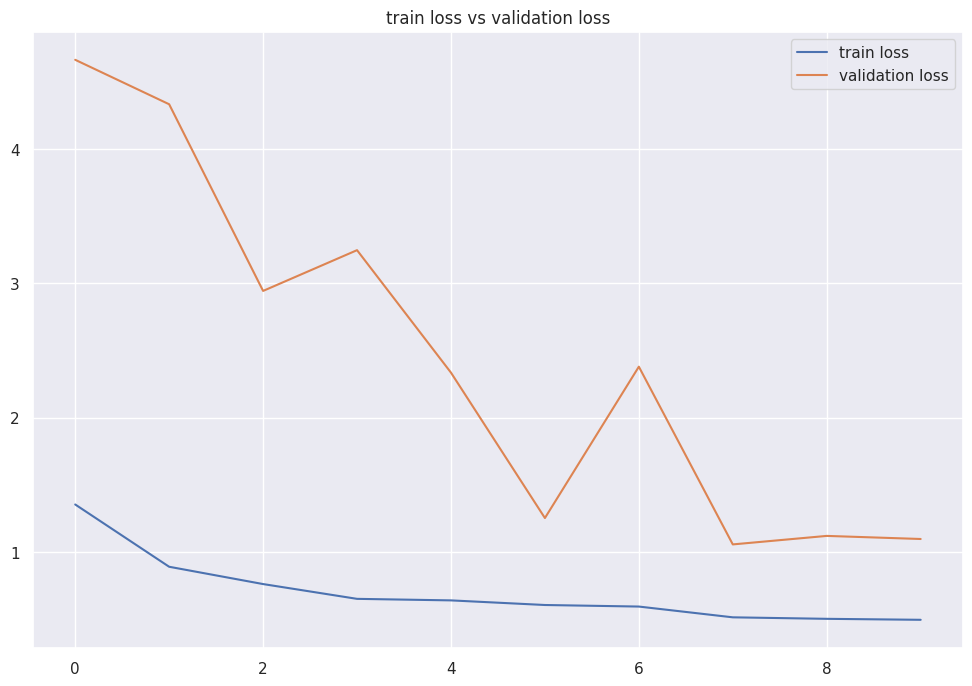

In [ ]:
#showing train loss courb and validation loss courb
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train loss")
plt.plot(np.arange(epochs),val_loss,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

In [ ]:
#using preentrained model such as VGG16
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense

vgg16 =VGG16(input_shape=(150,150,3), weights='imagenet', include_top=False)
# We don't want to train the vgg16 model again here.
for layer in vgg16.layers:
  layer.trainable = False
model_vgg16 = tf.keras.models.Sequential([
    vgg16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')])


58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
model_vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 18911556 (72.14 MB)
Trainable params: 4196868 (16.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
#vgg16 + ADAM
model_vgg16.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=81,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=14
)

Epoch 1/10
81/81 [==============================] - 1054s 13s/step - loss: 0.8542 - accuracy: 0.6700 - val_loss: 0.7381 - val_accuracy: 0.6310
Epoch 2/10
81/81 [==============================] - 765s 9s/step - loss: 0.3746 - accuracy: 0.8468 - val_loss: 0.5489 - val_accuracy: 0.7476
Epoch 3/10
81/81 [==============================] - 796s 10s/step - loss: 0.2788 - accuracy: 0.8908 - val_loss: 0.7387 - val_accuracy: 0.6786
Epoch 4/10
81/81 [==============================] - 838s 10s/step - loss: 0.1928 - accuracy: 0.9265 - val_loss: 0.8847 - val_accuracy: 0.6786
Epoch 5/10
81/81 [==============================] - 797s 10s/step - loss: 0.1459 - accuracy: 0.9465 - val_loss: 0.6866 - val_accuracy: 0.7333
Epoch 6/10
81/81 [==============================] - 793s 10s/step - loss: 0.0863 - accuracy: 0.9772 - val_loss: 0.7251 - val_accuracy: 0.7452
Epoch 7/10
81/81 [==============================] - 796s 10s/step - loss: 0.1021 - accuracy: 0.9618 - val_loss: 0.8389 - val_accuracy: 0.7310
Epoch 

In [ ]:
acc = history_vgg16.history['accuracy']
val_acc = history_vgg16.history['val_accuracy']

loss = history_vgg16.history['loss']
val_loss = history_vgg16.history['val_loss']
epochs = len(acc)

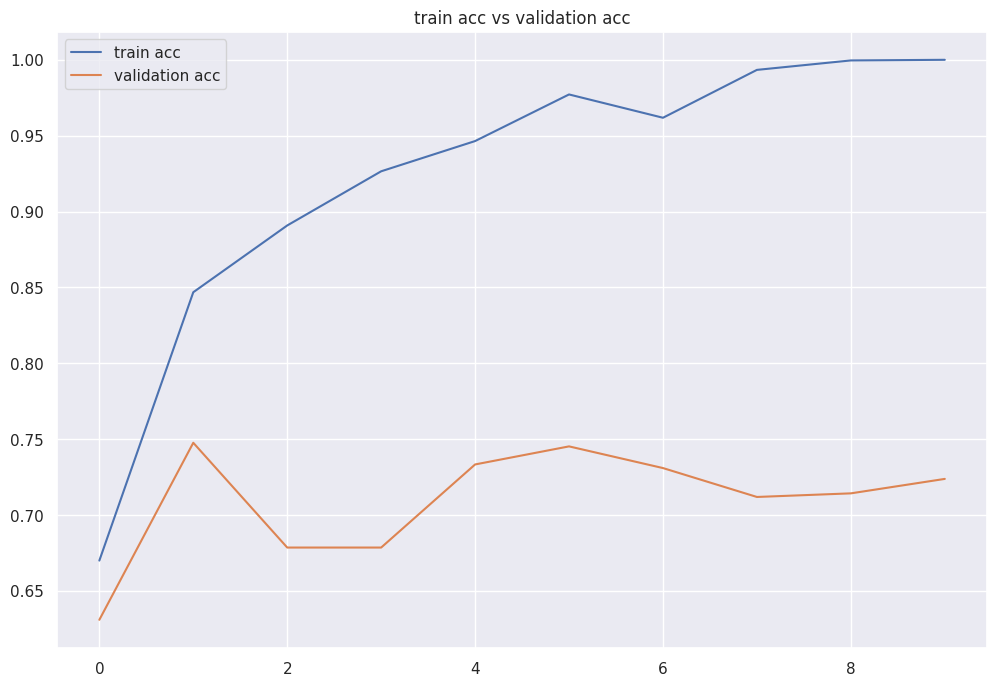

In [ ]:
#showing train accurary courb and validation accury courb(with vgg16)
import seaborn as sns
sns.set()
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

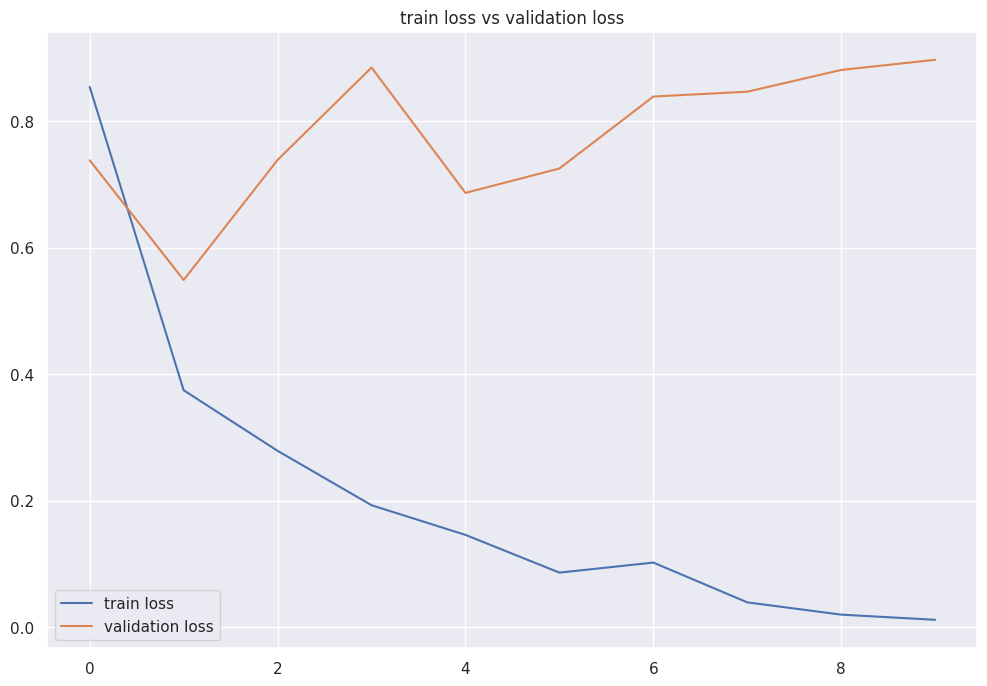

In [ ]:
#showing train loss courb and validation loss courb (with vgg16)
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train loss")
plt.plot(np.arange(epochs),val_loss,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

PREDICTION

In [ ]:
train_generator.class_indices

{'Chao': 0, 'Ervas': 1, 'Milho': 2, 'Milho_ervas': 3}

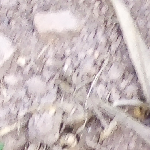

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/DeepMais_Data/ImagensTCCRotuladas/ImagensTCCRotuladas/Teste/Chao/Imagem_00337_T.jpg',target_size = (150,150))
x = image.img_to_array(img)
x = x[np.newaxis]
img

In [ ]:
x.shape

(1, 150, 150, 3)

In [ ]:
p= np.argmax(model_vgg16.predict(x))
if p==0:
  print('Chao')
elif p==1:
    print('Ervas')
elif p==2:
    print('Milho')
else:
    print('Milho_ervas')







1/1 [==============================] - 0s 278ms/step
Chao
